In [1]:
using Plots
using Random: MersenneTwister
using StatsBase: mean

include("../src/Simulation.jl")
using .Simulation: Param, Model, run!

include("../src/ColorScheme.jl")
using .ColorScheme
const CS = ColorScheme

println("Julia $(VERSION)")
println("Thread count: $(Threads.nthreads())")

Julia 1.10.2
Thread count: 12


In [2]:
default(
    fontfamily="Arial",
    titlefontsize=16,
    guidefontsize=14,
    tickfontsize=11,
    legendfontsize=11,
    margin=5Plots.mm,
    dpi=600,
);

In [3]:
function moving_average(data::Vector{<:Real}, window_size::Int = 10)::Vector{Float64}
    return [mean(data[max(1, i-window_size):min(end, i+window_size)]) for i in 1:length(data)]
end

function line_color(β::Float64, σ::Float64)::String
    return if (β, σ) == (0.1, 0.2)
        CS.BLUE
    elseif (β, σ) == (0.9, 0.1)
        CS.RED
    else
        CS.BLACK
    end
end;

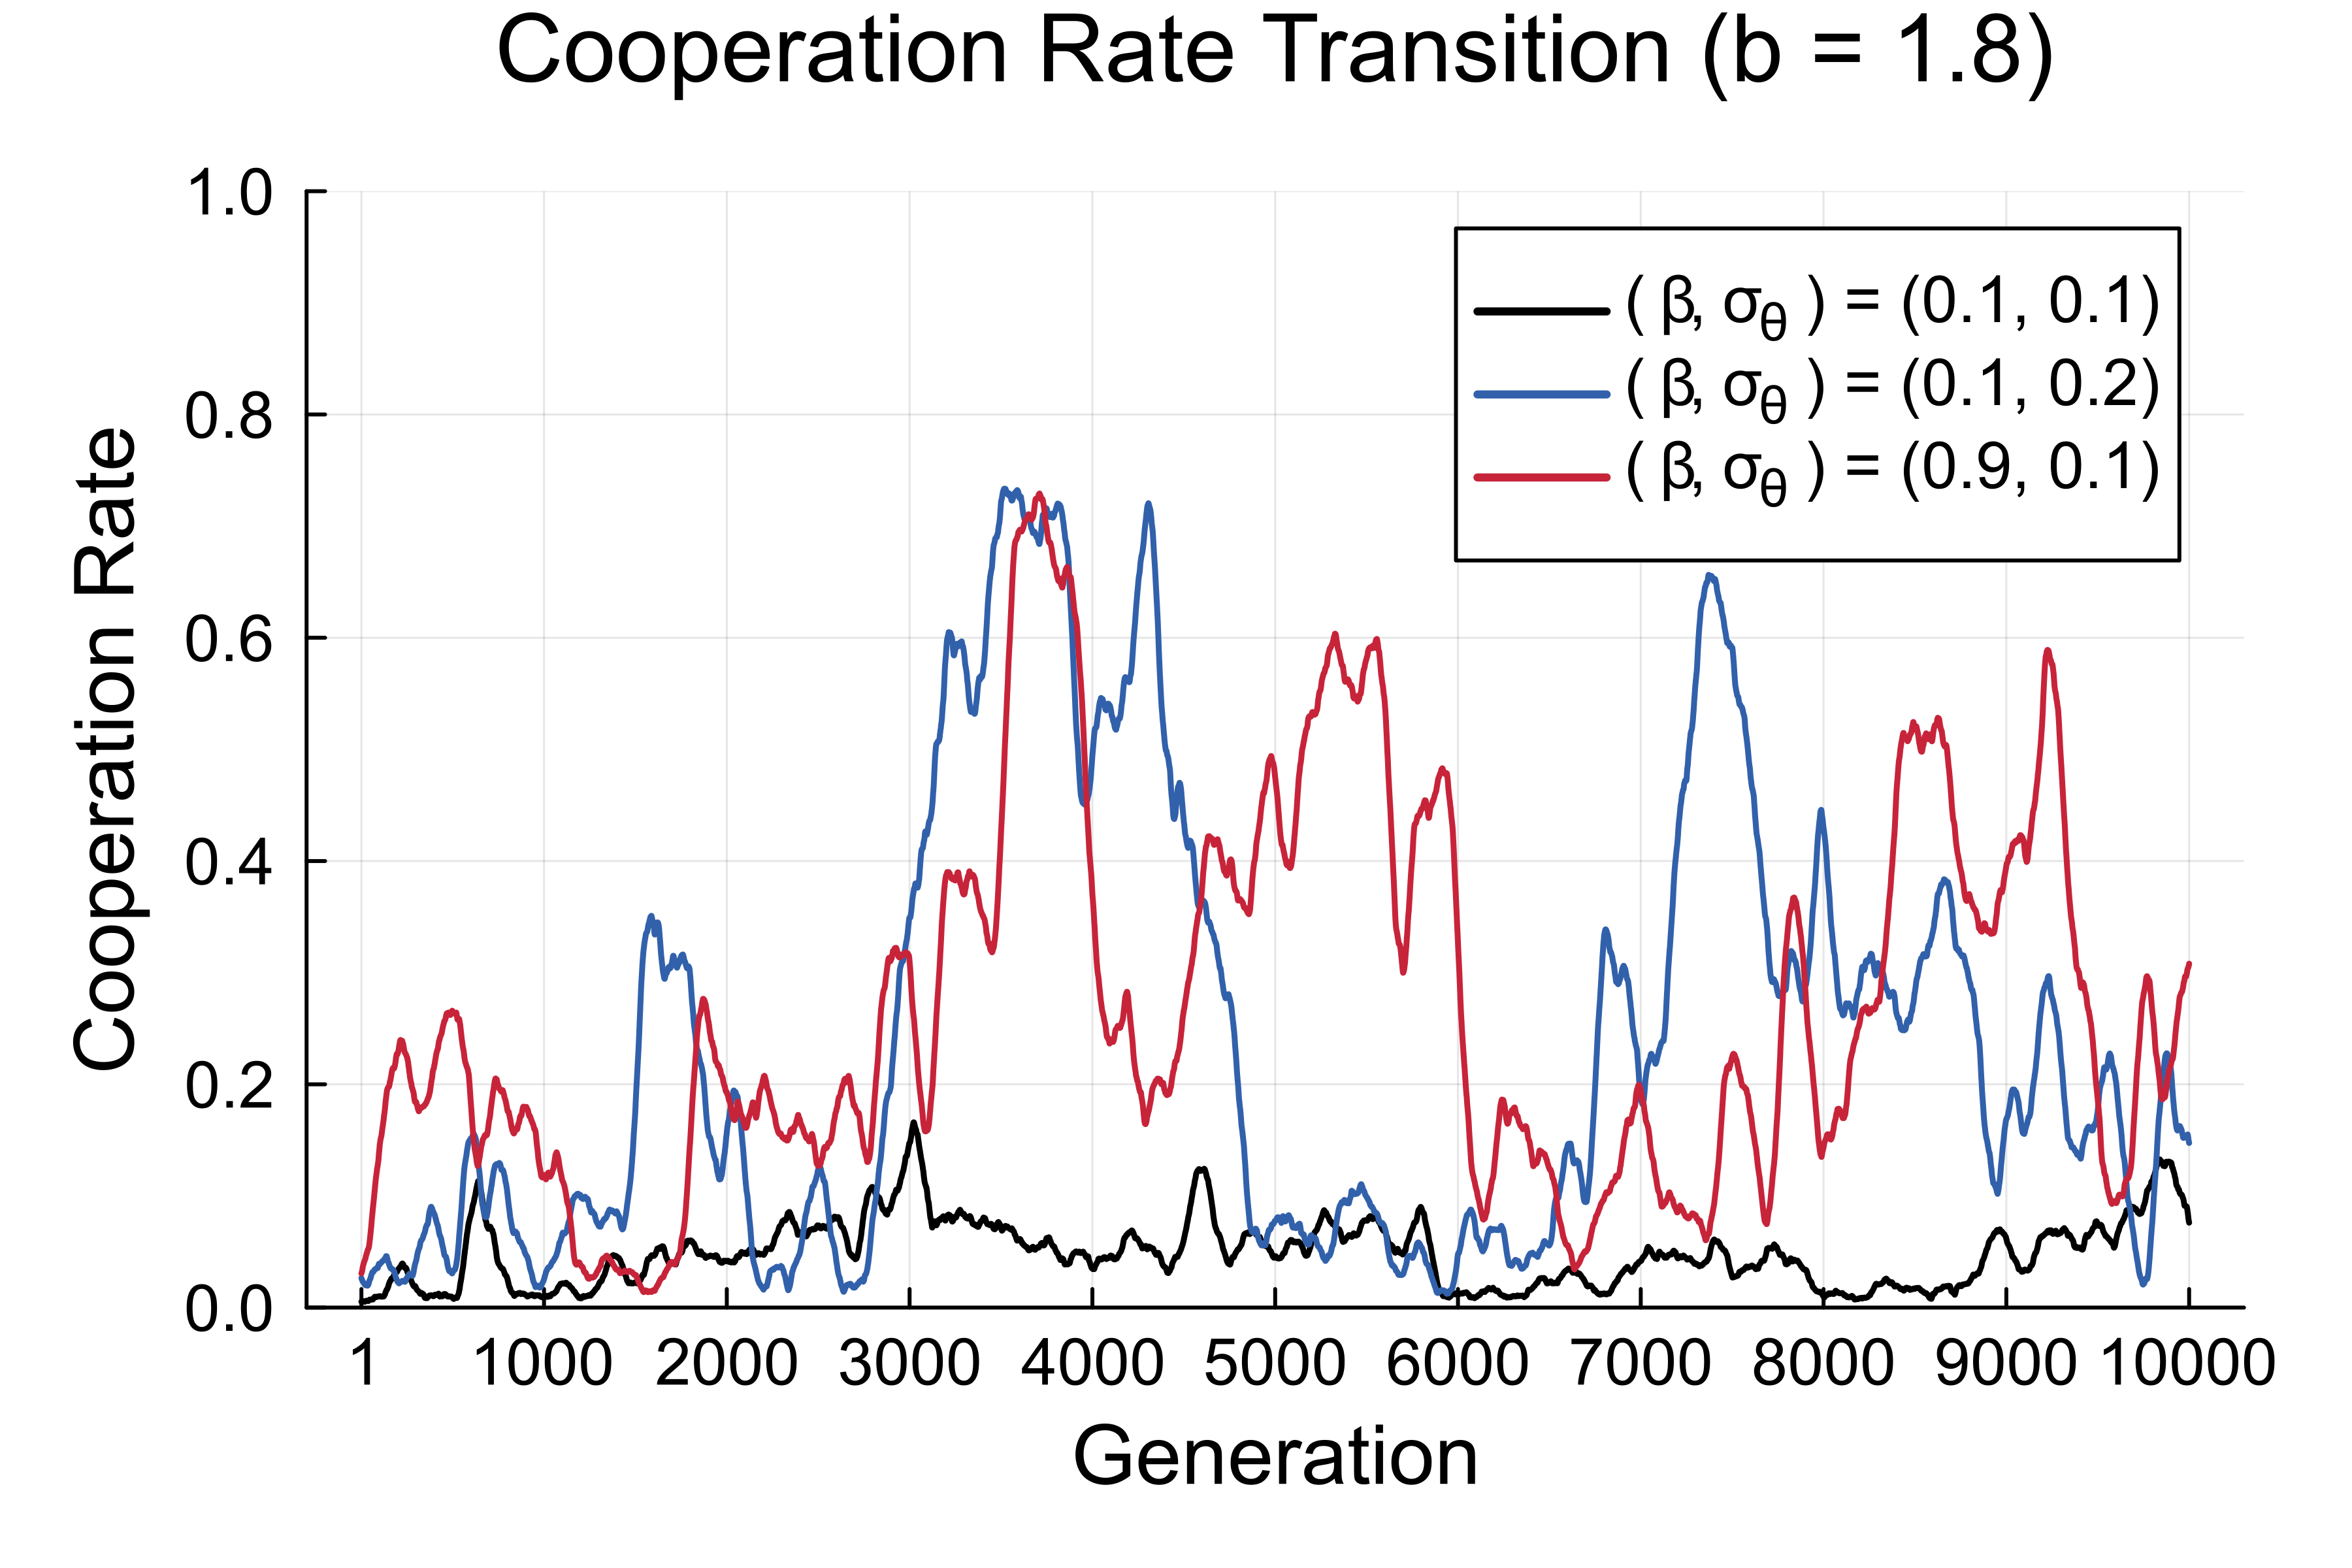

In [4]:
C_rate₀ = 0.0
b = 1.8
relationship_increment_factor = 1.0
resource_decrement_factor = 0.02
resource_limit_μ = 0.5
β_σ_vec = [(0.1, 0.1), (0.1, 0.2), (0.9, 0.1)]
peak_node_variability = 0
random_seed = 2
generations = 10_000

xticks = collect(0:1_000:generations)
xticks[1] = 1

plt = plot(
    xlabel="Generation", xticks=xticks,
    ylabel="Cooperation Rate", ylim=(0, 1),
    title="Cooperation Rate Transition (b = $(b))"
)

for (β, σ) in β_σ_vec
    p = Param(
        N = 100, k₀ = 4, generations = generations, b = b, C_rate₀ = C_rate₀,
        peak_node_variability = peak_node_variability,
        relationship_increment_factor = relationship_increment_factor,
        resource_decrement_factor = resource_decrement_factor,
        resource_limit_μ = resource_limit_μ,
        resource_limit_β = β,
        resource_limit_σ = σ,
    )
    m = Model(p, MersenneTwister(random_seed))
    C_rate_vec, = run!(m, MersenneTwister(random_seed))

    plot!(moving_average(C_rate_vec, 50), label="\\( \\beta, \\sigma_{\\theta} \\) = ($(β), $(σ))", lc=line_color(β, σ), lw=1.5)
end

display(plt)
savefig("img/Fig3b.png");